In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [14]:
cData=pd.read_csv("E://PREETI//DATA SCIENCE//Great Learning//Machine learning foundations//auto-mpg.csv")

In [12]:
cData.shape


(398, 8)

In [15]:
cData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Dropping unnecessary column

In [16]:
cData = cData.drop('car name', axis= 1)

In [17]:
cData['origin'] = cData['origin'].replace({1:'america', 2:'europe', 3:'asia'})

In [20]:
cData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


Creating Dummies Variables

In [24]:
cData = pd.get_dummies(cData, columns=['origin'])

KeyError: "None of [Index(['origin'], dtype='object')] are in the [columns]"

In [25]:
cData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


Dealing with Missing Values

In [26]:
cData.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [27]:
cData.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower         object
weight              int64
acceleration      float64
model year          int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

Changing the horsepower type and filling it with median 

In [28]:
hpIsDigit = pd.DataFrame(cData.horsepower.str.isdigit())

In [29]:
cData[hpIsDigit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [30]:
cData = cData.replace('?', np.nan)
cData[hpIsDigit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,0,0


In [31]:
cData.median()

mpg                 23.0
cylinders            4.0
displacement       148.5
horsepower          93.5
weight            2803.5
acceleration        15.5
model year          76.0
origin_america       1.0
origin_asia          0.0
origin_europe        0.0
dtype: float64

In [32]:
medianFiller = lambda x: x.fillna(x.median())
cData  = cData.apply(medianFiller, axis=0)
cData['horsepower']= cData ['horsepower'].astype('float64')

In [34]:
cData.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


Visualisation of Data

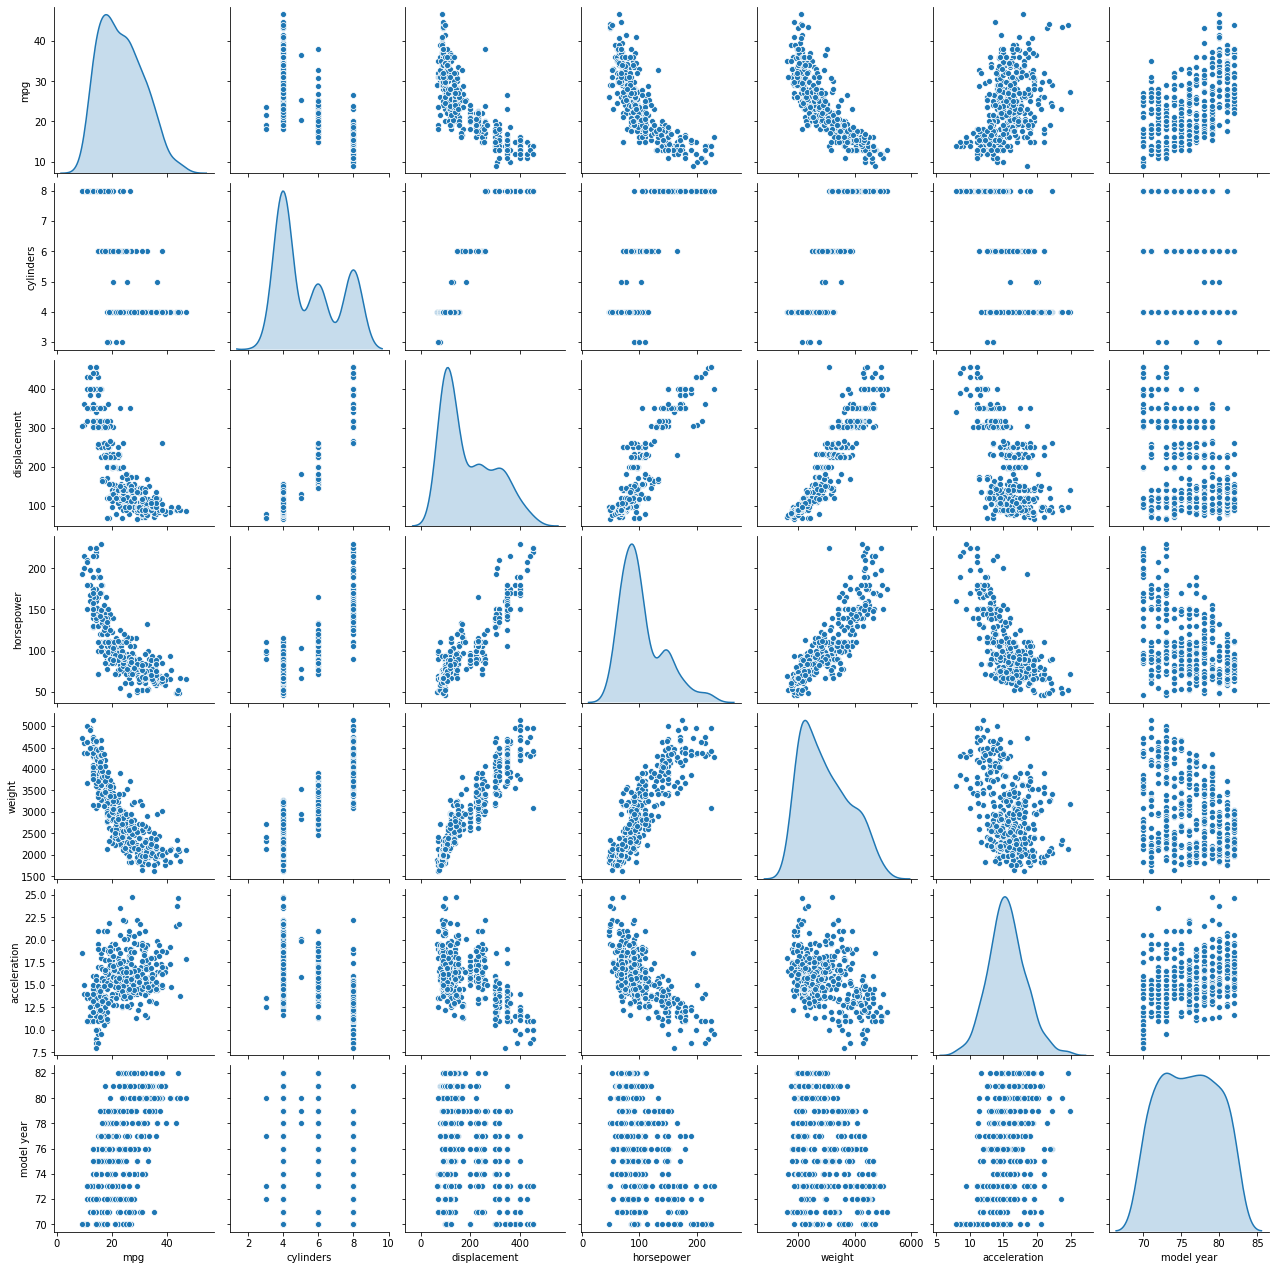

In [35]:
cData_attr= cData.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind= "kde")

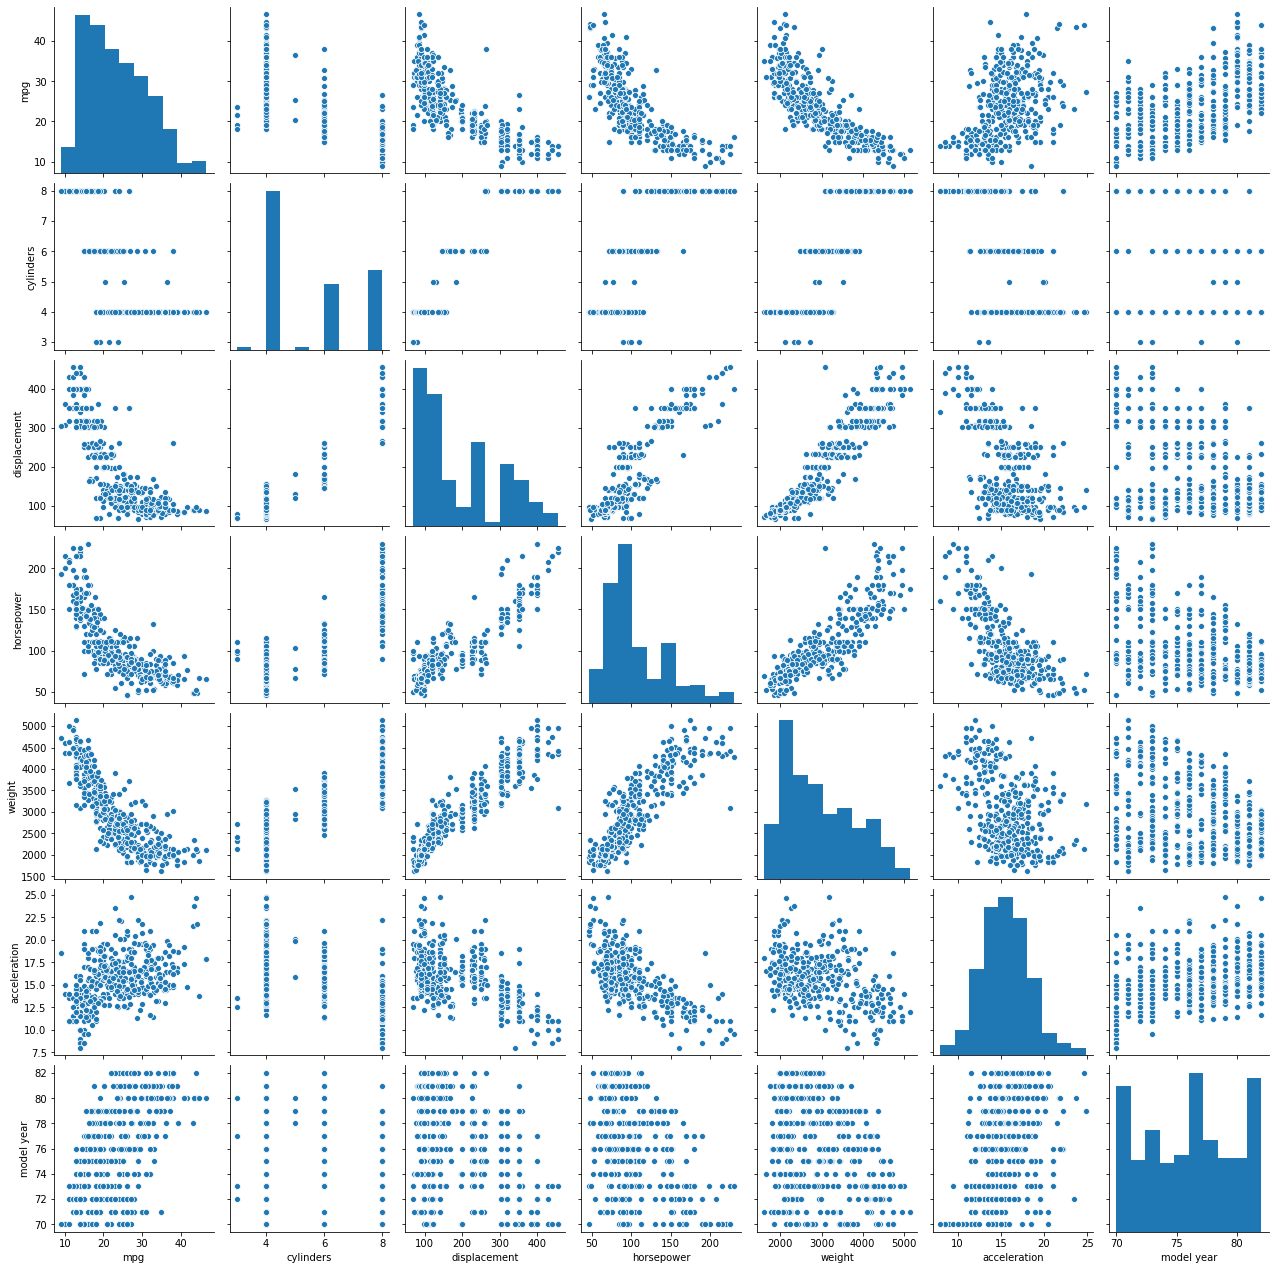

In [36]:
sns.pairplot(cData_attr)

SpliT Data

In [38]:
x = cData.drop(["mpg", "origin_europe"], axis= 1)

In [40]:
y= cData[["mpg"]]

In [41]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.30, random_state= 1)

Fit Linear Mdel

In [42]:
regression_model= LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format (col_name, regression_model.coef_[0][idx]))

The coefficient for cylinders is -0.394807966164821
The coefficient for displacement is 0.028945510765487178
The coefficient for horsepower is -0.021752207723546697
The coefficient for weight is -0.007352032065147347
The coefficient for acceleration is 0.06191936600761865
The coefficient for model year is 0.8369338917644995
The coefficient for origin_america is -3.0012830009185167
The coefficient for origin_asia is -0.606017964324738


In [44]:
intercept= regression_model.intercept_[0]
print (" The intercept for our model is {}".format (intercept))

 The intercept for our model is -18.283451116372117


The Score (R^2) for the in sample and out of sample

In [46]:
# From in the sample
regression_model.score(x_train, y_train)

0.814102550161056

In [48]:
# Out of sample
regression_model.score(x_test, y_test)

0.8433135132808833

Adding interaction terms

In [49]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly = PolynomialFeatures(degree= 2, interaction_only=True)
x_train2= poly.fit_transform(x_train)
x_test2= poly.fit_transform(x_test)
poly_clf = linear_model.LinearRegression()
poly_clf.fit(x_train2, y_train)
y_pred= poly_clf.predict(x_test2)
print(poly_clf.score(x_train2, y_train))

0.9015975295702481


In [51]:
print(poly_clf.score(x_test2, y_test))

0.8647441061510349


In [52]:
print(x_train.shape)
print(x_train2.shape)

(278, 8)
(278, 37)


End